# Generate random numbers and spot outliers

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Generate random uniform and normal nambers

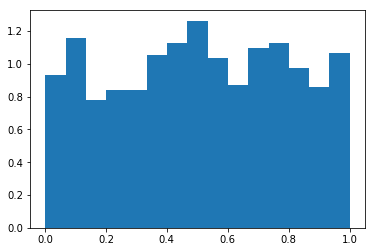

In [24]:
## generate random uniform numbers
rand_unif = np.random.uniform(low=0, high=1, size=1000)
_ = plt.hist(rand_unif, bins=15, normed=True)

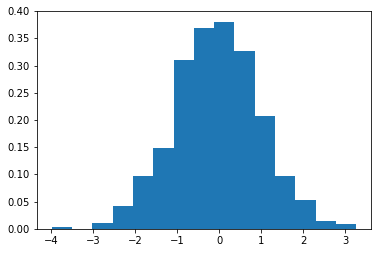

In [25]:
## generate random normals
rand_normal = np.random.normal(loc=0, scale=1, size=1000)
_ = plt.hist(rand_normal, bins=15, normed=True)

## Spot and delete outliers

In [105]:
############## Spot outliers ####################
## generate random uniform numbers
random_uniform = np.random.uniform(0, 1, 10)

## set some values to be big
for i in [1, 4, 7]:
    random_uniform[i] = 40
    
## the threshold for outliers
outlier_threshold = np.median(random_uniform) + 2 * np.std(random_uniform)

## find the outliers and set to nan
for i, value in np.ndenumerate(random_uniform):
    if value > outlier_threshold:
        random_uniform[i] = None
print(random_uniform)
# delete nan values
random_uniform = random_uniform[~np.isnan(random_uniform)]
random_uniform

[ 0.72903235         nan  0.54328896  0.6702424          nan  0.77119614
  0.8145356          nan  0.36348555  0.00967293]


array([ 0.72903235,  0.54328896,  0.6702424 ,  0.77119614,  0.8145356 ,
        0.36348555,  0.00967293])

In [109]:
## Faster way to delete the outliers
## generate random uniform numbers
random_uniform = np.random.uniform(0, 1, 10)

## set some values to be big
for i in [1, 4, 7]:
    random_uniform[i] = 40
print(random_uniform)

def reject_outliers(data, m=2):
    return data[abs(data - np.median(data)) < m * np.std(data)]

print(reject_outliers(random_uniform))

[  0.76020576  40.           0.90301888   0.99056471  40.           0.33934337
   0.23730585  40.           0.94409378   0.31477719]
[ 0.76020576  0.90301888  0.99056471  0.33934337  0.23730585  0.94409378
  0.31477719]


## Data Structures

### Arrays

**A contiguous block of memory**

* Mutable
* Retrieving and updating - O(1)
* Inserting and deleting - O(n)

### Strings

**A special kind of array made out of characters**

* Immutable
* s = s[1:] or s += '123' creates a new array of characters that is then assigned back to s.

### Linked Lists

**A singly linked list is a data struture that contains a sequence of nodes such that each node contains an object and a reference to the next node in the list.**

* Inserting and deleting - O(1)
* Obtaining *k*th element - O(n)

### Stacks

**Stacks support last-in, first-out semantics**

* push to the back - O(1)
* pop from the back - O(1)

### Queue

**Queues support first-in, first-out semantics**

* enqueue (push to the front) - O(1)
* dequeue (pop from the back) - O(1)


### Binary Trees

**A binary tree is either empty, or a *root* node *r* together with a left binary tree and a right binary tree. The subtrees themselves are binary trees**

* **Full binary tree**: Every node other than leaves has two children.
* **Perfect binary tree**: Full binary tree in which all leaves are at the same depth, and in which every parent has two children.
* **Complete binary tree**: Every level, except possibly the last, is completely filled, and all nodes are as far left as possible.

* A perfect binary tree of height *h* contains exactly $2^{h+1}-1$ nodes, of which $2^h$ are leaves.
* A complete binary tree on $n$ nodes has height $log{n}$
* The minimum value of the height of the tree is $log{n}$ (complete binary tree) and the maximum value is $n$ (skewed).


### Heaps

**Specialized binary tree - it is complete and the keys must satisfy the *heap property***

* heap_property
    * **max-heap**: the key at each node is at least as **great** as the keys stored at its children.
        * inserting - O(log n)
        * lookup for the max element - O(1)
        * deleting the max element - O(log n)
        * searching for arbitrary keys - O(n)
    * **min-heap**: the key at each node is at least as **less** as the keys stored at its children.
        * insertion - O(log n)
        * lookup for the min element - O(1)
        * deleting the min element - O(log n)
        * searching for arbitrary keys - O(n)
        
### Hash Tables

A hash table is a data structure used to store keys, optionally, with corresponding values.

* Insert, delete, lookup - O(1)

## Searching

### Binary search

Time complexity - O(n log n)

The idea is to eliminate half the keys from consideration by keeping the keys in sorted order. If the search key is not equal to the middle element of the array, one of the two sets of eys to the left and to the right of the middle element can be eliminated from further consideration.

In [1]:
def bsearch(t, A):
    L, U = 0, len(A) - 1
    while L <= U:
        M = (L + U) // 2
        if A[M] < t:
            L = M + 1
        elif A[M] == t:
            return M
        else:
            U = M - 1
    return -1

## Sorting


### Bubble Sort

Bubble Sort is the simplest sorting algorithm that works by repeatedly swapping the adjacent elements if they are in wrong order.

* Time complexity - O(n^2)
* Extra Space - O(1)

### Selection Sort

The selection sort algorithm sorts an array by repeatedly finding the minimum element (considering ascending order) from unsorted part and putting it at the beginning. The algorithm maintains two subarrays in a given array.   

In every iteration of selection sort, the minimum element (considering ascending order) from the unsorted subarray is picked and moved to the sorted subarray.

* Time complexity - O(n^2)
* Extra space - O(1)


### Insertion Sort

Insertion sort is a simple sorting algorithm that works the way we sort playing cards in our hands.  

Pick element arr[i] and insert it into sorted sequence arr[0…i-1]

* Time Complexity - O(n^2)
* Extra Space - O(1)

### Merge Sort

Merge Sort is a Divide and Conquer algorithm. It divides input array in two halves, calls itself for the two halves and then merges the two sorted halves. 

* Time complexity - O(n log n)
* Extra Space - O(n)

## Quick Sort

QuickSort is a Divide and Conquer algorithm. It picks an element as pivot and partitions the given array around the picked pivot. 

* Time complexity - O(n log n)
* Extra Space - O(1)